In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [2]:
# The code was removed by Watson Studio for sharing.

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,Clear,Dry,Daylight
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,Raining,Wet,Daylight


In [3]:
df_data.dropna(inplace=True)

In [4]:
df_data.drop(df_data[df_data['ROADCOND'] == "Unknown"].index , inplace = True) 
df_data.drop(df_data[df_data['WEATHER'] == 'Unknown' ].index, inplace = True) 

### Plotting some graphs to see the spread of data

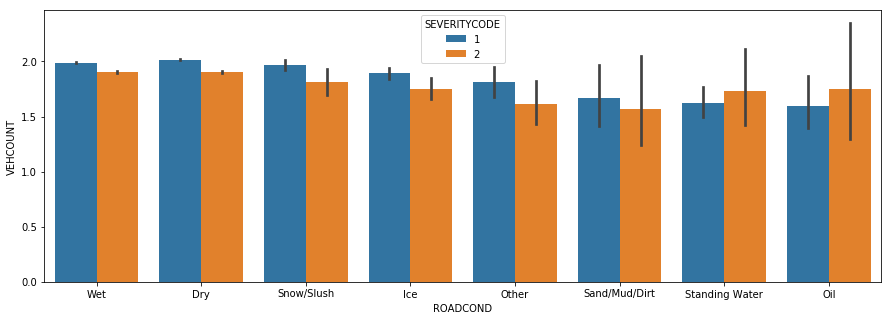

In [5]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="ROADCOND", y="VEHCOUNT",hue = "SEVERITYCODE", data=df_data)

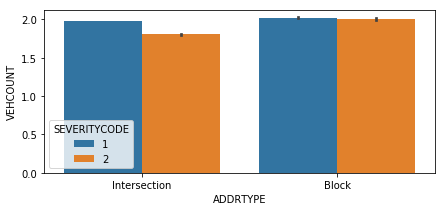

In [6]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x="ADDRTYPE", y="VEHCOUNT",hue = "SEVERITYCODE", data=df_data)

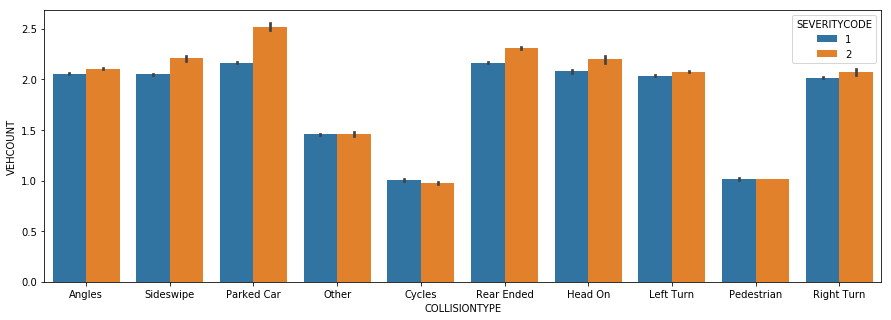

In [7]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="COLLISIONTYPE", y="VEHCOUNT",hue = "SEVERITYCODE", data=df_data)

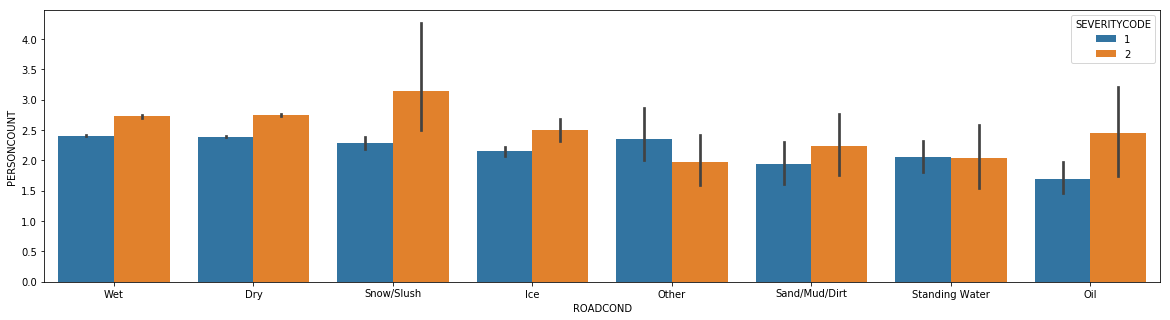

In [6]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="ROADCOND", y="PERSONCOUNT",hue = "SEVERITYCODE", data=df_data)

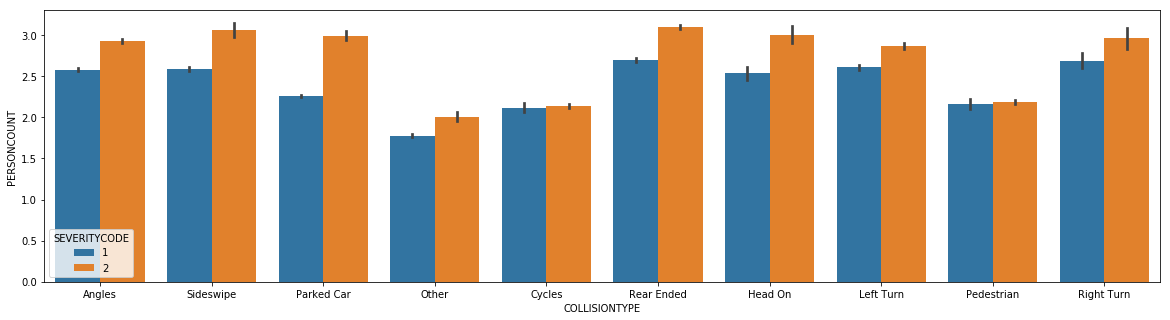

In [7]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="COLLISIONTYPE", y="PERSONCOUNT",hue = "SEVERITYCODE", data=df_data)

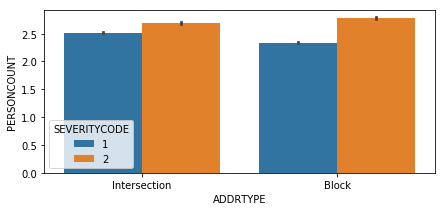

In [8]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x="ADDRTYPE", y="PERSONCOUNT",hue = "SEVERITYCODE", data=df_data)

In [7]:
Feature = df_data[['PERSONCOUNT','VEHCOUNT']]

In [8]:
Feature = pd.concat([Feature,pd.get_dummies(df_data['ROADCOND'])], axis=1)

In [9]:
Feature = pd.concat([Feature,pd.get_dummies(df_data['ADDRTYPE'])], axis=1)

In [10]:
Feature = pd.concat([Feature,pd.get_dummies(df_data['COLLISIONTYPE'])], axis=1)

In [11]:
X = Feature
y = df_data['SEVERITYCODE']

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


### Using different classification models for prediction and evaluating its accuracy

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [14]:
# We split the X into train and test to find the best k

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (118265, 22) (118265,)
Test set: (50685, 22) (50685,)


### K- Nearest Neighbours (KNN) Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
Ks=8
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.67118477, 0.69562987, 0.67714314, 0.69083555, 0.68207556,
       0.70399526, 0.70352175])

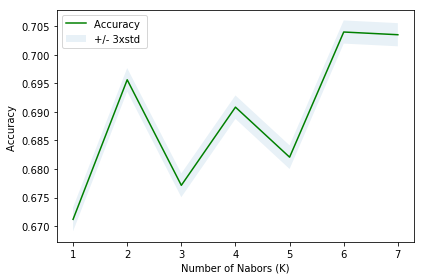

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7039952648712637 with k= 6


In [18]:
jaccard_similarity_score(y_test, yhat)

0.7035217519976324

In [19]:
f1_score(y_test, yhat, average='weighted')

0.6946286132691445

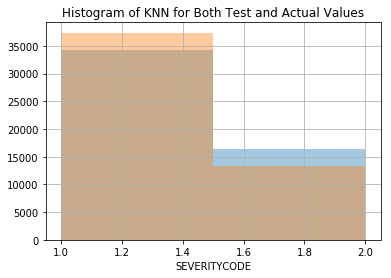

In [20]:
sns.distplot(y_test, kde = False, bins = 2)
sns.distplot(yhat, kde = False, bins =2).set_title("Histogram of KNN for Both Test and Actual Values")
plt.grid(True)
plt.show()


### Decision Trees Model

In [21]:
from sklearn.tree import DecisionTreeClassifier
severTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
severTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predTree = severTree.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7308868501529052


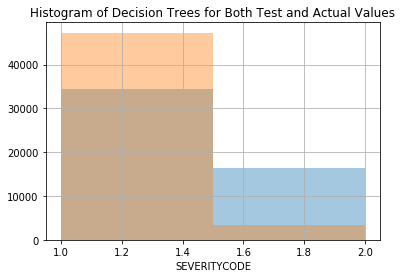

In [23]:
sns.distplot(y_test, kde = False, bins = 2)
sns.distplot(predTree, kde = False, bins =2).set_title("Histogram of Decision Trees for Both Test and Actual Values")
plt.grid(True)
plt.show()

In [24]:
jaccard_similarity_score(y_test, predTree)

0.7308868501529052

In [25]:
f1_score(y_test, predTree, average='weighted')

0.6642577404655813

### Support Vector Machines (SVM) Model

In [26]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
metrics.accuracy_score(y_test, y_svm)

0.7379106244451021

In [28]:
jaccard_similarity_score(y_test, y_svm)

0.7379106244451021

In [29]:
f1_score(y_test, y_svm, average='weighted')

0.6984138052288615

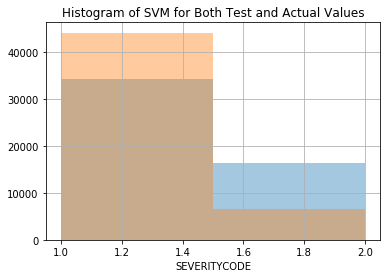

In [30]:
sns.distplot(y_test, kde = False, bins = 2)
sns.distplot(y_svm, kde = False, bins =2).set_title("Histogram of SVM for Both Test and Actual Values")
plt.grid(True)
plt.show()


### Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_log = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

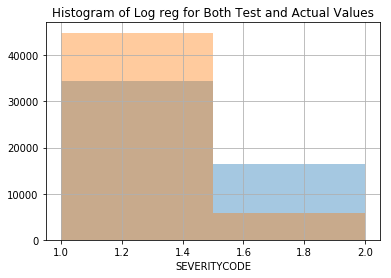

In [32]:
sns.distplot(y_test, kde = False, bins = 2)
sns.distplot(yhat_log , kde = False, bins =2).set_title("Histogram of Log reg for Both Test and Actual Values")
plt.grid(True)
plt.show()

In [33]:
jaccard_similarity_score(y_test, yhat_log)

0.7376146788990826

In [34]:
f1_score(y_test, yhat_log, average='weighted')

0.6925785965003031

In [35]:
log_loss(y_test, yhat_prob)

0.5167843451094222